In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *
from plotnine import *


# Convolutional Neural Network RNN

Debido a que, para nosotros, es prácticamente imposible usar una de las CNN ganadoras de las conferencias, vamos a reutilizar los pesos aprendidas por alguna de estas redes neuronales. Para ello, usted deberá:

1. Iportar la libreria VGG16 de las aplicaciones de keras.
2. Cargar el modelo y ver de que se trata (summary).
3. Cargar una imagen a su gusto y predecir su valor.

# Learned model

In [2]:
#Loading a model is very simple 
# load vgg model
from tensorflow.keras.applications.vgg16 import VGG16
# load the model (500MB)
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
#Applying the model
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# predict the probability across all output classes
yhat = model.predict(img)

# convert the probabilities to class labels
label = decode_predictions(yhat)
label

# # retrieve the most likely result, e.g. highest probability
# label = label[0][0]
# print('%s (%.2f%%)' % (label[1], label[2]*100))

[[('n01558993', 'robin', 0.99951136),
  ('n04604644', 'worm_fence', 0.0004557797),
  ('n01530575', 'brambling', 3.0146968e-05),
  ('n01806567', 'quail', 8.0744815e-07),
  ('n01798484', 'prairie_chicken', 4.475636e-07)]]

# Learned model, convolutional patterns

In [5]:
#Loading a model is very simple 
# load vgg model
from tensorflow.keras.applications.vgg16 import VGG16
# load the model (500MB)
model = VGG16()

#Creating the same process than before, to visualize the patterns
#Extracting the layers
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


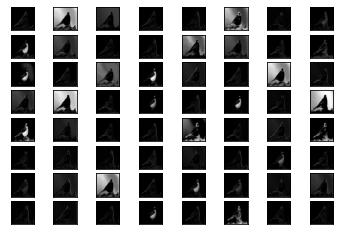

In [7]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from matplotlib import pyplot

#Creating a model using the first output layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()